In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np


data = pd.read_csv('Mall_Customers.csv')
print(data.columns)

data

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [2]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

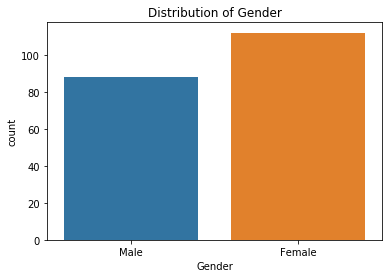

In [4]:
plt.figure()
sns.countplot(x='Gender',data=data)
plt.title('Distribution of Gender');
#남녀 count분포를 알아보았는데 여성 고객이 더 많음을 확인할 수 있습니다

Text(0.5, 0, 'Age')

<Figure size 432x288 with 0 Axes>

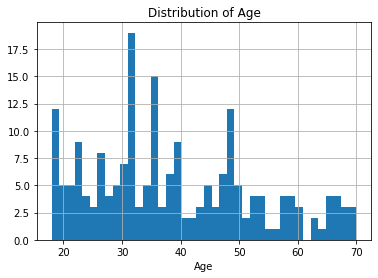

In [5]:
plt.figure()
data.hist('Age',bins=40)
plt.title('Distribution of Age')
plt.xlabel('Age')
#히스토그램을 통해 나이 분포를 확인하였습니다
#나이대가 다양하게 분포되어 있음을 확인할 수 있습니다
#대체적으로 50-70대보다는 20-50대에 많이 분포하고 있습니다

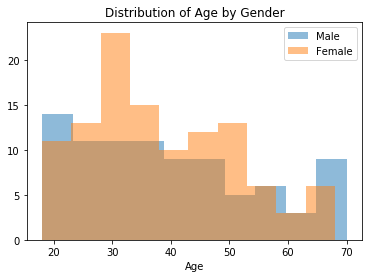

In [6]:
plt.figure()
plt.hist('Age', data= data[data['Gender']=='Male'],alpha=0.5,label='Male')
plt.hist('Age', data = data[data['Gender']=='Female'],alpha=0.5,label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

#이것도 히스토그램을 통해 남녀 성별에 따른 나이분포도 확인하였습니다
#여성 30대가 눈에 띄게 많이 분포함을 확인할 수 있습니다

Text(0.5, 0, 'dollars')

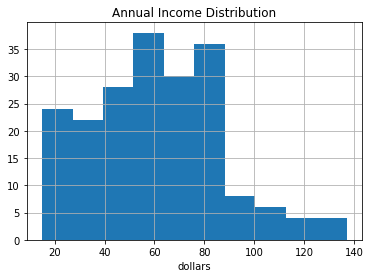

In [7]:
data.hist('Annual Income (k$)')
plt.title('Annual Income Distribution')
plt.xlabel('dollars')
#수익 변수의 value들을 히스토그램을 통해 분포를 확인했습니다
#60-80 k$에 많이 분포하고 있고 그 이상은 별로 분포하지 않음을 확인하였습니다

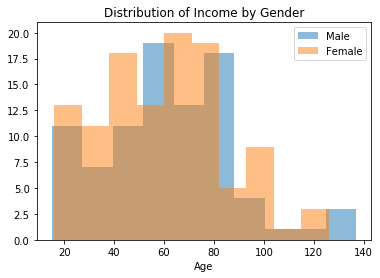

In [8]:
plt.figure()
plt.hist('Annual Income (k$)', data= data[data['Gender']=='Male'],alpha=0.5,label='Male')
plt.hist('Annual Income (k$)', data = data[data['Gender']=='Female'],alpha=0.5,label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Age')
plt.legend()
#annual income를 성별에 따른 분포를 확인하기 위해 히스토그램을 그렸습니다

In [9]:
#Spending score by gender
print(data[data['Gender']=='Male']['Spending Score (1-100)'].mean())
print(data[data['Gender']=='Female']['Spending Score (1-100)'].mean())
#성별에 따른 spending score의 평균을 확인하였습니다
#여성 고객의 spending score의 평균이 약 3점정도 높았습니다

48.51136363636363
51.526785714285715


In [10]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [11]:
data.iloc[:,1:].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(0.5, 1, 'all variables correlation')

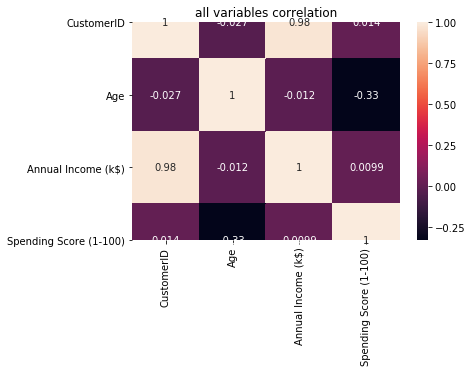

In [12]:
plt.figure()
sns.heatmap(data.corr(),annot = True)
plt.title('all variables correlation')
#전체적인 상관관계를 확인하기 위해 상관계수를 확인하였습니다
#spending score과 age는 정말 상관이 없음을..? 확인하였습니다

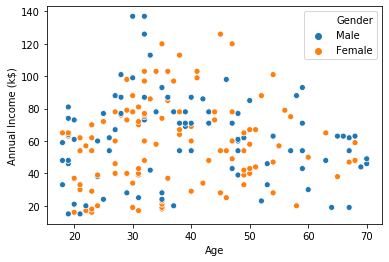

In [15]:
plt.figure()
sns.scatterplot('Age','Annual Income (k$)', hue = 'Gender', data = data)
#두변수당 관계 그래프를 만들고 성별당 분포를 확인해보기 위해 scatter plot을 사용하였습니다
#이 두 변수는 2d상으로 확인할 때 clustering이 잘 안될 것 같네요..!

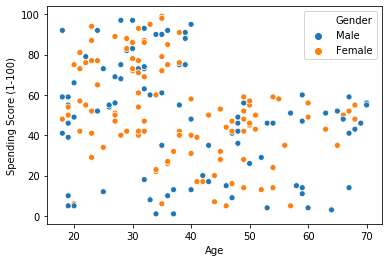

In [16]:
plt.figure()
sns.scatterplot('Age','Spending Score (1-100)', hue = 'Gender', data = data)

#age와 spending score 두 변수 사이의 관계 속 gender 당 분포를 확인하였습니다
#이 역시 clustering 2d로 확인하기 힘들 것 같습니다

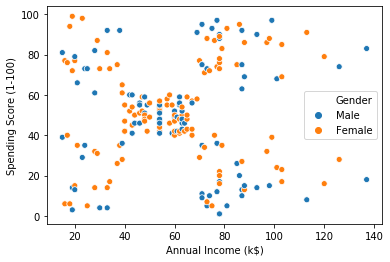

In [17]:
plt.figure()
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', hue = 'Gender', data = data)
#annual income변수와 spending score 변수 사이의 관계 그래프를 하고 gender 분포를 확인하였습니다
#이 두 변수의 관계로 그려진 그래프에서는 clustering으로 cluster이 잘 그려질 듯하여서
#아래 진행한 clustering을 시각화 할때 (2d로) 이 두 변수로 표현하기로 결정했습니다

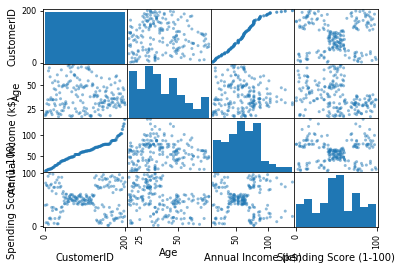

<Figure size 432x288 with 0 Axes>

In [8]:
pd.plotting.scatter_matrix(data)
plt.figure()
plt.show()
#scatter plot을 통해 대충 어떻게 clustering 하면 될지 확인할 수 있었습니다

# Preprocessing

In [22]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#전처리
#ID 변수는 drop했습니다! id변수는 고유변수이기 때문에 drop시켰습니다
data.drop('CustomerID',axis=1,inplace=True)

In [12]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [13]:
#gender변수는 encoding하였습니다
def encoding(x):
    if x == 'Male':
        return 1
    else:
        return 0
data['Gender'] = data['Gender'].apply(encoding)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [14]:
#scaling도 진행했습니다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data_s = scaler.transform(data)
df = pd.DataFrame(data_s)

In [15]:
df.columns = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


## Hierarchical Clustering

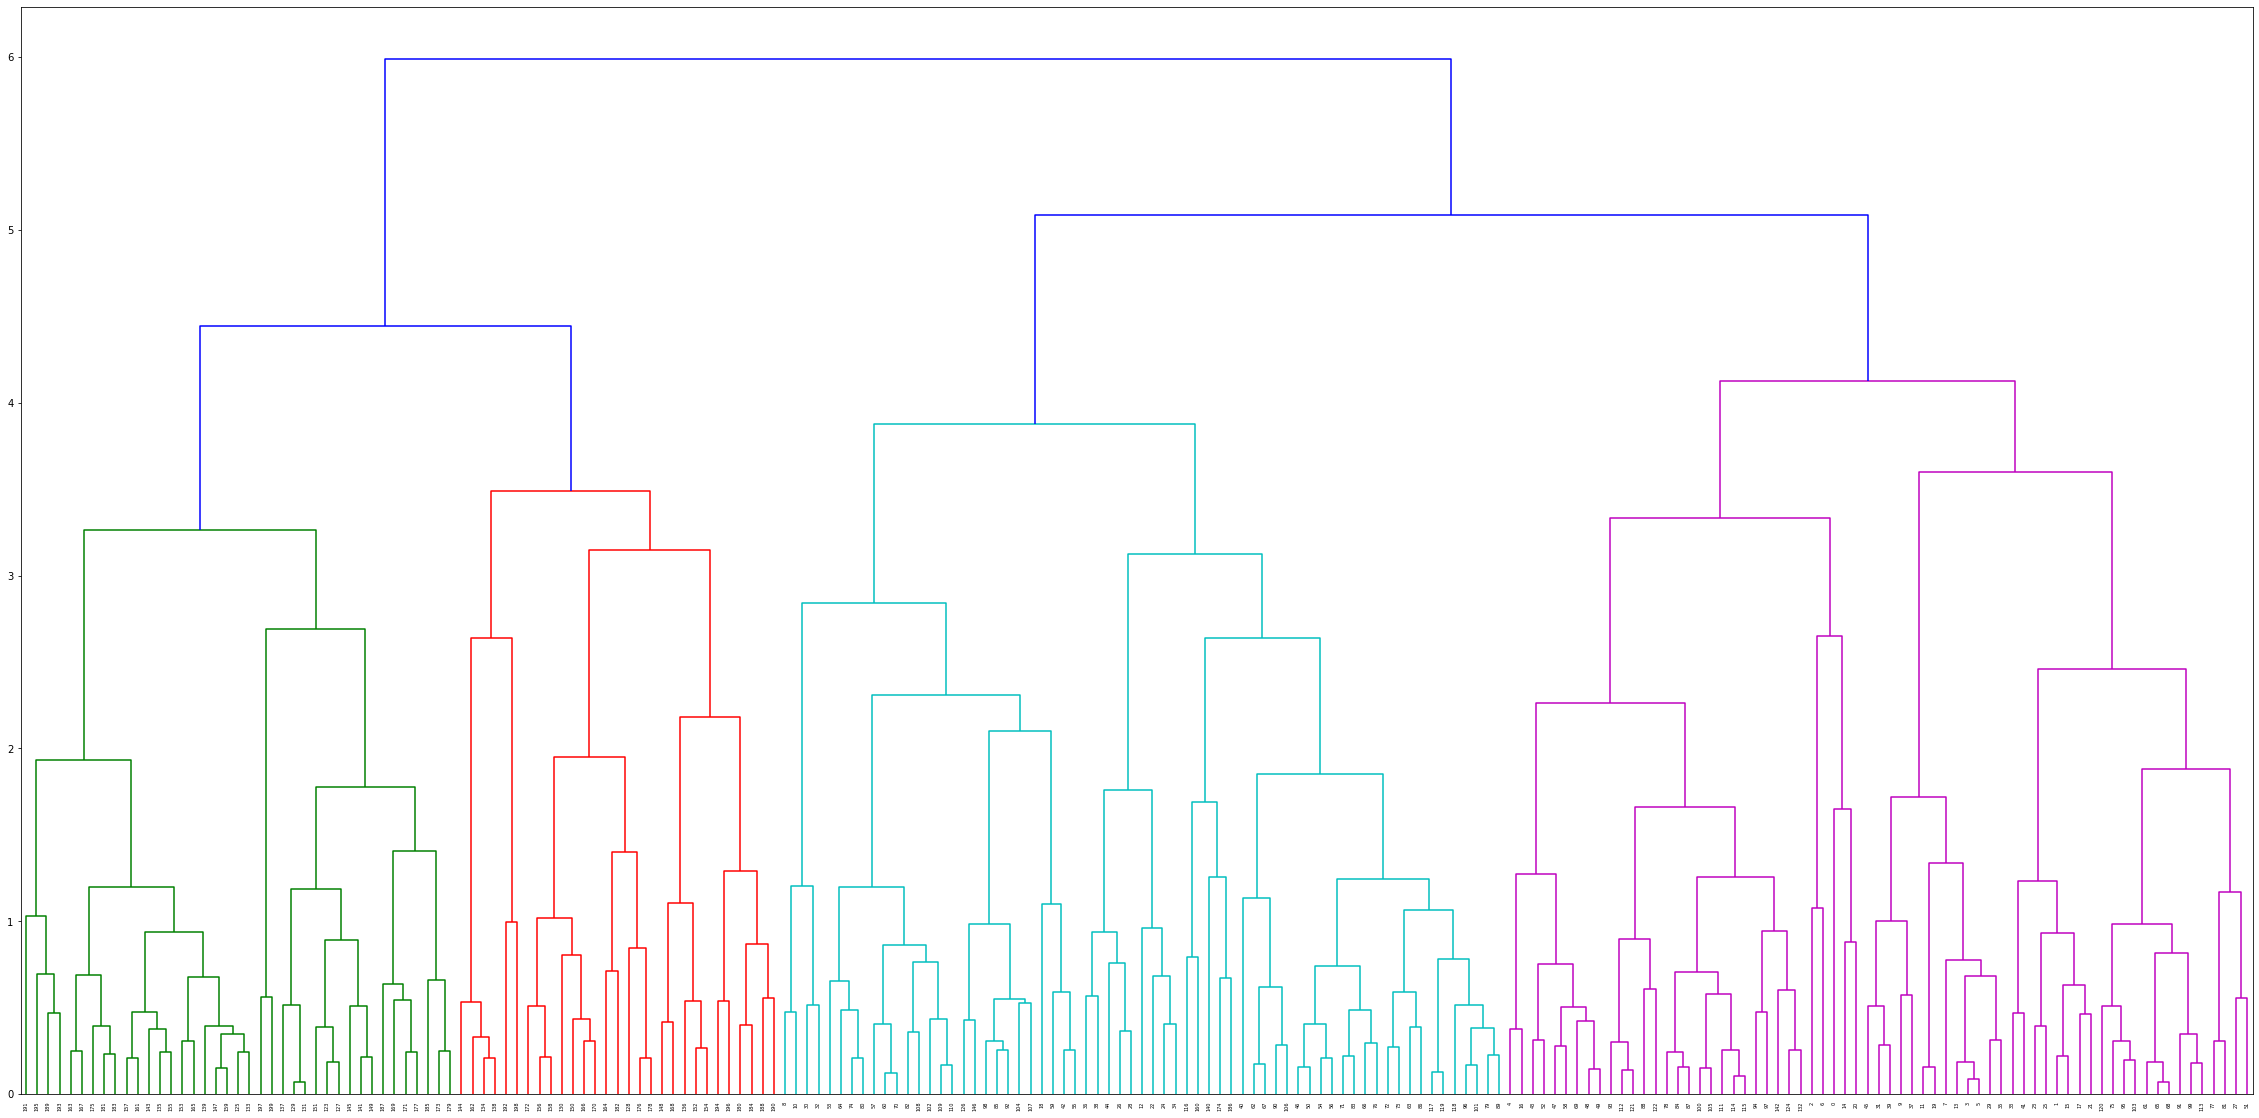

In [16]:
#첫번째로 hierarchical clustering 진행했습니다
#dendrogram 그려서 cluster 개수 정하고 그 파라미터 사용해 agglomerative clustering 진행했습니다
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram, ward
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
# method = 'single','complete', 'average', 'weighted', 'centroid', 'median', 'ward'
mergings = linkage(df, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings)
           
plt.show()

In [17]:
linkage_array = ward(data_s)
linkage_array

array([[6.50000000e+01, 6.80000000e+01, 7.17666897e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 7.17666897e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 9.00803899e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 1.05730374e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.20910138e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 1.30409100e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.38349565e-01, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 1.43533379e-01, 2.00000000e+00],
       [1.00000000e+02, 1.05000000e+02, 1.48690768e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 1.53511726e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 1.55855895e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 1.56659188e-01, 2.00000000e+00],
       [1.10000000e+01, 1.90000000e+01, 1.57536024e-01, 2.00000000e+00],
       [9.60000000e+01, 1.01000000e+02, 1.67142352e

In [18]:
from sklearn.cluster import AgglomerativeClustering
#위에 덴드로그램을 확인한 결과 cluster개수 12가 적당하다고 판단하여 Agglomerative진행할 때 cluster 수 12개로 지정했습니다
agg = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster = agg.fit_predict(df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Spending Score (1-100)')

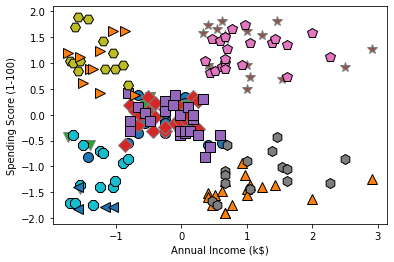

In [19]:
#시각화시켜 보았습니당
import mglearn
mglearn.discrete_scatter(data_s[:, 2], data_s[:, 3], cluster)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

In [20]:
#evaluation!
#실루엣 스코어로 evaluation하였습니다!
from sklearn.metrics.cluster import silhouette_score
print(silhouette_score(df, cluster))
#0.42가 나오네요

0.42440324303677535


In [ ]:
#dunn index를 통해서도 evaluation 진행하고 싶었는데
#dunn index값을 확인할 수 있는 라이브러리인 jqmcvi?가 계속 설치에 실패해서 실루엣 스코어로만 평가했습니다..!ㅜㅜ


## K-means Clustering

In [21]:
#그 다음은 k-means clustering을 진행하였습니다
#이 두변수에 기반하여 clustering 
#먼저 3d로 나타낼때는 3개의 변수만 사용해 보았습니다
#뒤에서는 data전체 사용해 clustering도 진행했습니다!
x = df.iloc[:,[0,1,2,3]]
x.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [22]:
from sklearn.cluster import KMeans
distortions=[]
for i in range (1,20):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)


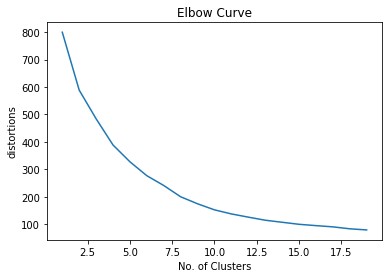

In [23]:
# Visualising elbow method
plt.plot(range(1,20),distortions)
plt.xlabel("No. of Clusters")
plt.ylabel("distortions")
plt.title("Elbow Curve")
plt.show()

#optimal number of clusters = 12!!!로 결정

In [24]:
feature = df[ ['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=12,algorithm='auto')
cluster_kmeans = model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [26]:
r.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100),predict
0,-1.424569,1.128152,-1.738999,-0.434801,1
1,-1.281035,1.128152,-1.738999,1.195704,1
2,-1.352802,-0.886405,-1.700830,-1.715913,5
3,-1.137502,-0.886405,-1.700830,1.040418,10
4,-0.563369,-0.886405,-1.662660,-0.395980,5


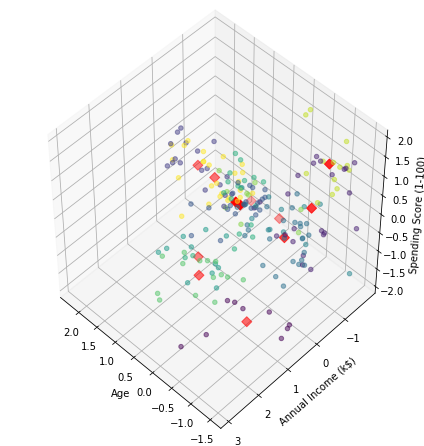

In [27]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Age','Gender','Annual Income (k$)','Spending Score (1-100)'])
center_x = centers['Age']
center_y = centers['Annual Income (k$)']
center_z = centers['Spending Score (1-100)']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

#실습코드에 있던 3d로 표현했습니다!
#이 때 x,y,z축은 각각 age, annualincome, spending score로 지정하였어요

In [242]:
cluster_kmeans = model.fit_predict(data_s)
#이번엔 2d로 시각화해보았습니다

Text(0, 0.5, 'Spending Score (1-100)')

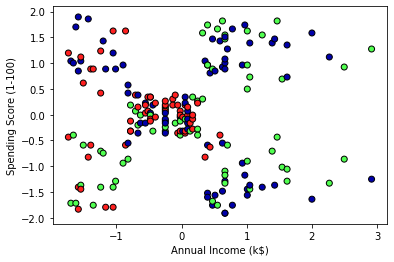

In [243]:
plt.scatter(data_s[:, 2], data_s[:, 3],c=cluster_kmeans, cmap=mglearn.cm3,
                edgecolors='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")



In [244]:
#Evaluation
#이역시 실루엣 스코어로 evaluation 진행했습니다
print(silhouette_score(df,cluster_kmeans))
#0.413정도가 나오네요

0.4129706962977262


## DBSCAN

In [99]:
#다음은 DBSAN clustering을 진행하였습니다
X = df.iloc[:,[0,1,2,3]]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc 참고!

In [245]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

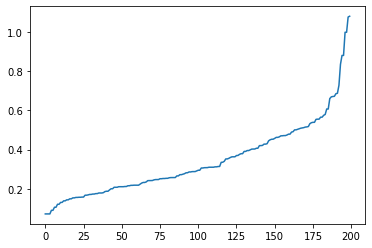

In [246]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#그래프를 통해 eps값은 0.6이 적당함을 확인했습니다

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


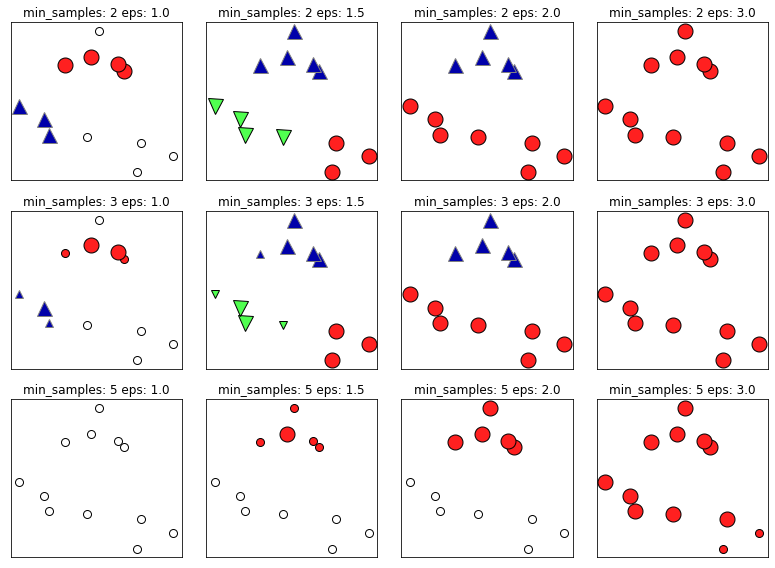

In [247]:
import mglearn
mglearn.plots.plot_dbscan()

In [103]:
#앞서 확인한 것을 토대로 eps=0.6 min_samples=2로 결정하고 DBSCAN을 진행했습니다
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.6,min_samples=2)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

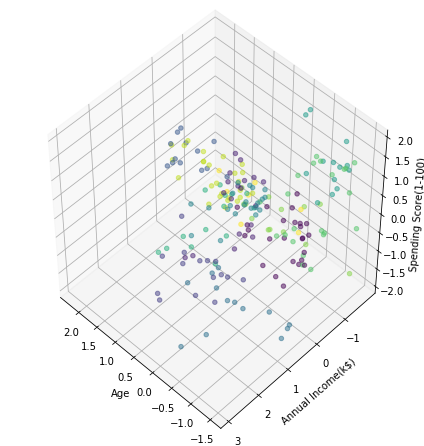

In [248]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score(1-100)')
plt.show()
#이거도 3D로도 표현했습니다

In [249]:
cluster_dbscan = model.fit_predict(data_s)

Text(0, 0.5, 'Spending Score (1-100)')

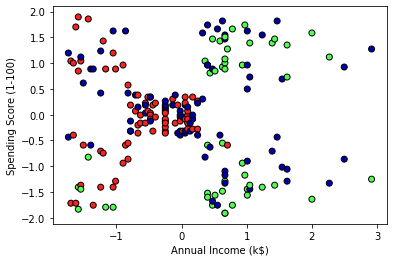

In [250]:
plt.scatter(data_s[:, 2], data_s[:, 3],c=cluster_dbscan, cmap=mglearn.cm3,
                edgecolors='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
#2d로도 시각화시켰습니다

In [251]:
#역시 실루엣스코어로 evaluation 했습니다
print(silhouette_score(df,cluster_dbscan))
#0.428이 나왔습니다

0.42827048078985924


## SpectralClustering

In [277]:
#새로운 clustering으로 진행하였습니다
#spectralclustering을 선택했는데 
#이 클러스터링은 데이터간의 거리에 기반한 유사도 행렬을 계산한 이후 각 노드가 각 그룹을 분리하기 쉬운 더 낮은 차원으로 이동하고
#사영된 낮은 차원의 공간에서의 거리를 기반으로 kmeans와 같은 알고리즘을 통해 클러스터를 생성하는 방법입니다!

from sklearn.cluster import SpectralClustering

# create model and prediction
model = SpectralClustering(n_clusters=14)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)


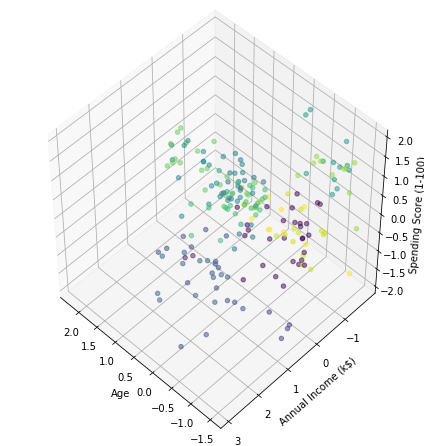

In [278]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
#먼저 3D로 표현하였습니다

In [279]:
cluster_spectral = model.fit_predict(data_s)

Text(0, 0.5, 'Spending Score (1-100)')

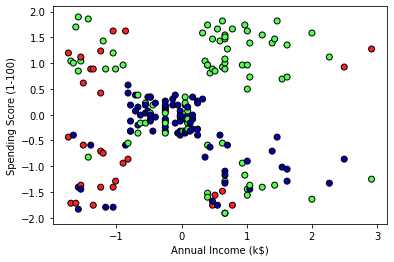

In [280]:
plt.scatter(data_s[:, 2], data_s[:, 3],c=cluster_spectral, cmap=mglearn.cm3,
                edgecolors='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
#2d로도 표현하였습니다

In [281]:
#evaluation 
#실루엣 스코어를 확인해 보았습니다
print(silhouette_score(df,cluster_spectral))


0.42618891261236735
